In [1]:
from pathlib import Path

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

import dnb
import brpylib

In [2]:
filename = '20190122-065346-004'

datafile = f'data/{filename}.ns6'
datapath = Path(datafile)

start_time_s = 1.0
plot_chan = 1

elec_ids     = list(range(1, 97))      # 'all' is default for all (1-indexed)
data_time_s  = 2.0 # 'all' # 2.0                     # 'all' is default for all
downsample   = 1        

In [3]:
# Open file and extract headers
nsx_file = brpylib.NsxFile(str(datapath))

# Extract data - note: data will be returned based on *SORTED* elec_ids, see cont_data['elec_ids']
cont_data = nsx_file.getdata(elec_ids, start_time_s, data_time_s, downsample, full_timestamps=True)

# Close the nsx file now that all data is out
nsx_file.close()


data\20190122-065346-004.ns6 opened

*** WARNING: Channels [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96] do not exist in the data

data\20190122-065346-004.ns6 closed


## RAW

In [4]:
# Plot the data channel
seg_id = 0
ch_idx  = cont_data["elec_ids"].index(plot_chan)
t = cont_data["data_headers"][seg_id]["Timestamp"] / cont_data["samp_per_s"]

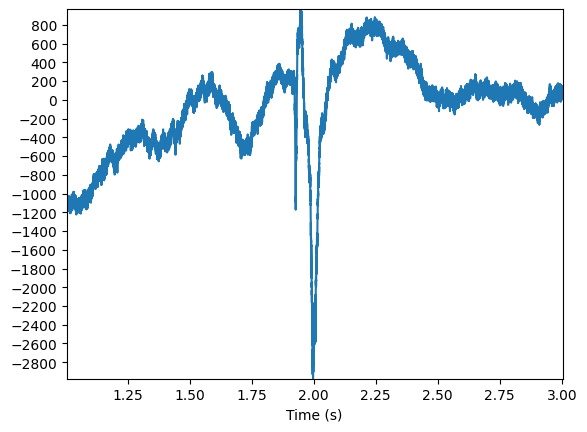

In [5]:
plt.plot(t, cont_data["data"][seg_id][ch_idx])
plt.axis([t[0], t[-1], min(cont_data["data"][seg_id][ch_idx]), max(cont_data["data"][seg_id][ch_idx])])
plt.locator_params(axis="y", nbins=20)
plt.xlabel("Time (s)")
# plt.ylabel("Output (" + nsx_file.extended_headers[hdr_idx]['Units'] + ")")
# plt.title(nsx_file.extended_headers[hdr_idx]['ElectrodeLabel'])
plt.show()

## DNB

In [14]:
b, a = dnb.filters.with_bounds_coeffs([80,120], cont_data["samp_per_s"])
dnb_signal = dnb.filters.apply_filter(b, a, cont_data["data"][seg_id][ch_idx])

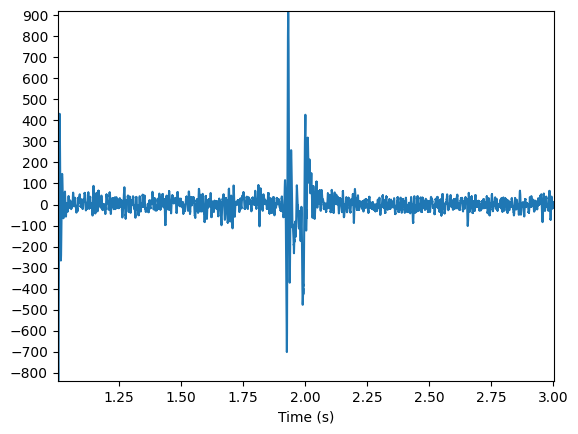

In [15]:
plt.plot(t, dnb_signal)
plt.axis([t[0], t[-1], min(dnb_signal), max(dnb_signal)])
plt.locator_params(axis="y", nbins=20)
plt.xlabel("Time (s)")
# plt.ylabel("Output (" + nsx_file.extended_headers[hdr_idx]['Units'] + ")")
# plt.title(nsx_file.extended_headers[hdr_idx]['ElectrodeLabel'])
plt.show()

## Scipy

In [16]:
b, a = signal.butter(2, [80, 120], 'bp', fs=cont_data["samp_per_s"])

In [17]:
scipy_signal = signal.lfilter(b,a,cont_data["data"][seg_id][ch_idx])

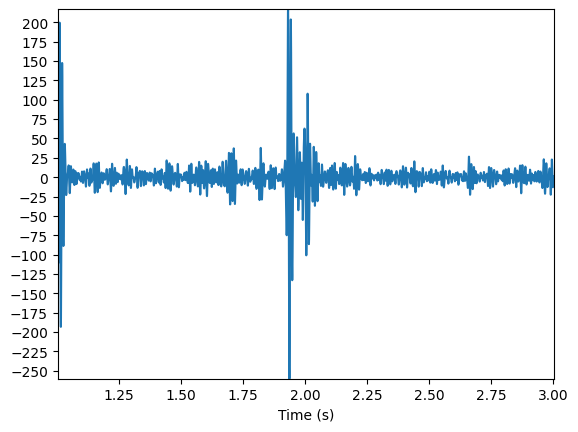

In [18]:
plt.plot(t, scipy_signal)
plt.axis([t[0], t[-1], min(scipy_signal), max(scipy_signal)])
plt.locator_params(axis="y", nbins=20)
plt.xlabel("Time (s)")
# plt.ylabel("Output (" + nsx_file.extended_headers[hdr_idx]['Units'] + ")")
# plt.title(nsx_file.extended_headers[hdr_idx]['ElectrodeLabel'])
plt.show()